# Data science for Machine Learning: lecture 4
## Topics from data science and data mining used in ML

Mehrdad Yazdani <br>
@crude2refined

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image

%matplotlib inline

# Overview


- Intro to ensemble models: bagging trees  and Random Forests
<br>
<br>
- Logistic Regression vs Support Vector Machines
<br>
<br>
- Kernel methods and the kernel trick
  - feaure mapping
  - 1-nearest neighbors
<br>
<br>
- Motiviation for neural networks

# Supervised learning: Classification vs Regression

<img src="./imgs/Lecture-1/ML-pipe.png">

- Can think of supervised learning as learning a "black box" that transforms the input to a desired output
- Regression: the output $y \in \mathbb{R}$
    - Usually can be generalized easily to multiple outputs $y \in \mathbb{R}^{m}$
- Classification: the output is one of $m$ categories $y \in \{0, 1, \ldots, m -1\}$ 


- We can think of characterizing this black box as a function $f(x)$ that maps inputs from $x \in \mathbb{R}^{n}$ to outputs $y$ 

# Parametric black box

- Describe the input and output relationship with a function:

$$ y \approx f_{w}(x)$$

- Assume a functional relationship between input $x \in \mathbb{R}^{n}$ and output $y \in \mathbb{R}^{m}$ with a *parametric* function $f_{w}(\cdot)$ that is characterized by a set of parameters $w \in \mathbb{R}^{p}$.

- We define a *loss function* $L\big(f_{w}(x), y\big) \ge 0$ that measures how much mismatch we have between $f_{w}(x)$ and $y$
    - Loss functions used in regression: least squares, least absolute deviations, huber,


- For a given $f_{w}(\cdot)$, we want to find the parameters $w$ so that the *expected loss* or *risk* is minimized

$$R(w) = E\big\{L\big(f_{w}(x), y\big)\big\}$$ 

- In practice, we cannot compute full expectation because we do not have access to $p(x,y)$. Therefore, we estimate (based on the sample dataset that we have) the *empirical risk*:


$$R_\text{emp}(w) = \sum_{i=1}^{N} L\big(f_{w}(x_{i}), y_{i}\big)$$ 

- Where $\big\{(x_i, y_i), i = 1,\ldots , N \big\}$ is the *training set*


- How we learn: find the set of parameters $w$ that minimize the empirical risk


$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} &\sum_{i=1}^{N} L\big(f_{w}(x_{i}), y_{i}\big)
\end{aligned}$$ 

- For $x_i \in \mathbb{R}^{n}$, $y \in \mathbb{R}^{m}$and $w \in \mathbb{R}^{p}$


# Regularization to improve generalizability

- What we really care about is *not* how small we can get the empirical risk on the training set, but rather on *unseen data*
    - A hold out test set is meant to serve as a proxy for unseen data



- So we have to make sure that the solution $w^{*}$ that we find is *generalizable* to unseen data


- Modify the loss function to include some regularization terms to restrict the parameters $w$

$$L_{\theta}\big(f_{w}(x_{i}), y_{i}\big) = L\big(f_{w}(x_{i}), y_{i}\big) + E_{\theta}(w)$$

- $w$ are the *parameters* that characterize the functional relationship $f_{w}(\cdot)$ between the inputs $x$ and $y$


- $\theta$ are the set of *hyper parameters* or *meta parameters* that characterize the general "complexity" of the parameters through the function $E_{\theta}(w) \ge 0 $
    - Usually anything that is not $w$ is called a referred to as a hyper 
   
   
- For a *fixed* $\theta$, we again minimize the empirical risk to find $w^{*}$    

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} &\sum_{i=1}^{N} L_{\theta}\big(f_{w}(x_{i}), y_{i}\big)
\end{aligned}$$ 

- The best set of hyper parameters is found through cross validation using gridsearch or other search techniques such as:
    - Random search
    - Bayesian optimization

# Cost sensitive classificaiton and dealing with imbalanced data

- In classification problems, it is not rare to have circumstances where we have rare instances of particular classes
  - Majority of transactions are not fraud
  - Most tumors are benign 
  
$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} &\sum_{i=1}^{N} c_{-1}I(y_i = -1)L_{\theta}\big(f_{w}(x_{i}), y_{i}\big) + \sum_{i=1}^{N}c_{+1}I(y_i = +1)L_{\theta}\big(f_{w}(x_{i}), y_{i}\big)
\end{aligned}$$ 

$$I(y = 1) = \left\{\begin{matrix}
1 & \text{if } y = 1\\ 
0 & \text{otherwise}
\end{matrix}\right.$$

<img src="./imgs/lecture-4/imbalanced-data.png">

# What are the sources of error?
<br>


$$y = f(x) + \epsilon$$

$$y \approx \widehat{f}_{w}(x)$$

- What are the sources of error in our approximation? 

$$
\begin{align*}
E[(y-\widehat{f}_{w})^2] &= \text{Var}[y] + E\big\{\big(\widehat{f}_{w} - E^{2}\{\widehat{f}_{w}\}\big)^{2}\big\} + E^{2}[(f-\widehat{f}_{w})]\\
&= \sigma^{2} + \text{Var}[\widehat{f}_{w}] + \text{Bias}[\widehat{f}_{w}]
\end{align*}
$$

- Irreducible error: $\sigma^{2}$ this is measurement noise and there is little we can do about it (without using specialized knowledge)



- Bias: the mismatch between our model assumption and the true underlying input and output relationship
  - When both the training and test error are bad (compared to random baseline), we are likely in a high bias regime 
- Variance: sensitivity of model behavior changes between the training data and test data 
  - When the training error is very low but the test error is high, we are likely in the high variance regime
  
  
- Influential summary: Advice for Apply Machine Learning by Andrew Ng 
  - http://cs229.stanford.edu/materials/ML-advice.pdf


# Decision Trees




- In decision trees, the input space $x \in \mathbb{R}^{n} are carved up into specific regions


$$ f(x) = \sum_{m=1}^{M}c_{m}I(x \in R_{m})$$

- $R_m$ are the different regions of the input space and are subsets of the input space $R_{m} \subset \mathbb{R}^n$


- $m = 1, \ldots, M$ refer to the $M$ different regions that input space has been carved up into 


- $I(\cdot)$ is an indicator function. It's value is 1.0 is if $x \in R_{m}$ and 0 otherwise


- $c_m \in \mathbb{R}$ is the output value of the function for a given input $x \in \mathbb{R}^n$

<img src="./imgs/lecture-3/decision-regions.png" height="400" width="400">

- In practice, each region is determined in a greedy fashion by each input variable individually 

- We also restrict the tree to be a binary tree

<img src="./imgs/lecture-3/binary-tree.png" height="400" width="400">

- Each split is made to make the distribution of the trees to increase the "purity" of the region

<img src="./imgs/lecture-3/decision-tree.png" height="600" width="600">

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

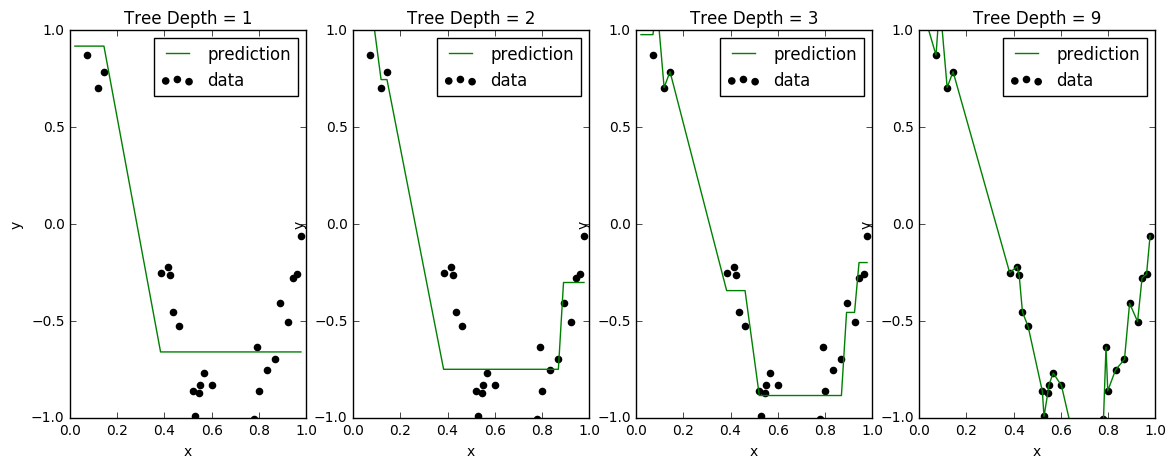

In [3]:
plt.figure(figsize=(14, 5))
from sklearn.tree import DecisionTreeRegressor

# #############################################################################
# Fit regression model
depths = [1, 2, 3, 9]

for i, depth in enumerate(depths):
    dt = DecisionTreeRegressor(max_depth=depth)
    y_ = dt.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(depths), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X[:,np.newaxis], y_, c='g', label='prediction')
    plt.legend()
    plt.title("Tree Depth = %i" % (depth))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")

# Decision Trees Advantages

- Features can be any type (numerical or categorical), including missing values


- Trees can be often interpretable 



- Robust to different scalings of the data


# So many models, which to pick?

- Does averaging models help? 

- Usually, averaging models improves the model variance (not necessarily bias)

$$y \approx \widehat{f}_{B}(x)$$


$$ \widehat{f}_{B}(x) = \frac{1}{B}\sum_{j=1}^{B}f_{j}(x)$$

- What are the sources of error in our approximation? 

$$
\begin{align*}
E[(y-\widehat{f}_{B})^2] &= \text{Var}[y] + E\big\{\big(\widehat{f}_{B} - E^{2}\{\widehat{f}_{B}\}\big)^{2}\big\} + E^{2}[(f-\widehat{f}_{B})]\\
&= \sigma^{2} + \text{Var}[\widehat{f}_{B}] + \text{Bias}[\widehat{f}_{B}]
\end{align*}
$$


- For "uncorrelated" estimators $f_{j}(x)$, as we increase $B$ the variance term will decrease
  - Another way of saying this is that we want the estimators $f_{j}$ to be different and diverse
  
  

- Bagging, short for bootstrapped aggregation, is a method for developing many such diverse estimators   
  - Resample the training data (with resampling) many times and build a separate model for each sample
  - Aggregate all the models
  
  
 

<img src="./imgs/lecture-3/bootstrap-sample.png" height="600" width="600">

<img src="./imgs/lecture-3/boot-600x713.png" height="600" width="600">

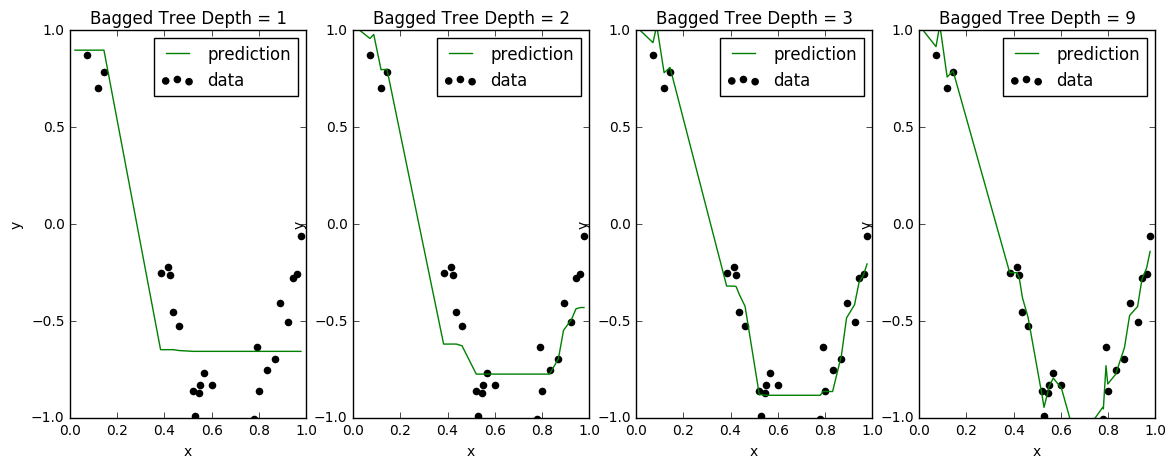

In [4]:
plt.figure(figsize=(14, 5))

from sklearn.ensemble import BaggingRegressor

# #############################################################################
# Fit regression model
depths = [1, 2, 3, 9]

for i, depth in enumerate(depths):
    dt = BaggingRegressor(DecisionTreeRegressor(max_depth=depth), n_estimators=100)
    y_ = dt.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(depths), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X[:,np.newaxis], y_, c='g', label='prediction')
    plt.legend()
    plt.title("Bagged Tree Depth = %i" % (depth))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")

# How can we get more independent models?


- The variance of the average of $B$ identically distributed (but not independent) random variables with pairwise correlation $\rho$ and variance $\sigma^{2}$ is:

$$ \rho\sigma^{2} + \frac{1-\rho}{B}\sigma^{2}$$


- $\sigma^{2}$ is determined by each individual model $f_j$. If we can make the $f_j$ less correlated with each this will reduce $\rho$. Increasing more models $f_j$ 


- Bagged data sets are highly correlated so more bagging does not help. What can we do to make the data sets less correlated?


- Idea: apply "bagging" (sampling) to not just the samples (rows of data) but also the *features* (the columns of data)
  - Typically when we bag samples (rows) it sampling *with* replacement
  - When we apply bagging to the features, we do sample *without* replacement
  

<img src="./imgs/lecture-4/boot-bag.png" height="600" width="600">

# Random Forests

- When we apply bagging to both the samples and the features and build trees, we will have a "forest" of trees


- The Random Forests algorithms adds an additional element of randomness in each individual tree construction to further reduce tree correlations
  - Create bagged samples (take samples with replacement from the original dataset)
  - Build tree for each bag, but before each split, randomly select a subset $m$ of the features for determining splits
  
  
  
  
- Each tree has been overfit, but each in a "random" way
    - So when we average the overfit trees, the variance is reduced



- Extremely useful off-the-shelf non-linear supervised models


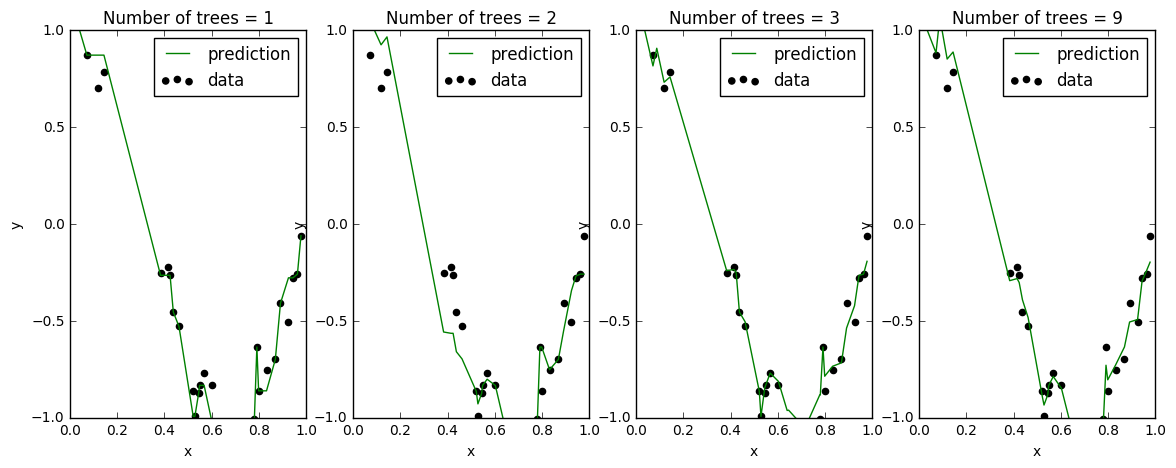

In [5]:
plt.figure(figsize=(14, 5))

from sklearn.ensemble import RandomForestRegressor
# #############################################################################
# Fit regression model
depths = [1, 2, 3, 9]

for i, depth in enumerate(depths):
    dt = RandomForestRegressor(n_estimators=1*depth)
    y_ = dt.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(depths), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X[:,np.newaxis], y_, c='g', label='prediction')
    plt.legend()
    plt.title("Number of trees = %i" % (depth))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")

# Random Forests pros and cons


- When using lots of estimators, Random Forests resist against overfitting


- Since they are based on trees, can handle categorical, skewed, and missing data gracefully


- So what is the limitation?
    - If the feature representations are "bad" learning is difficult




# Designing better features by projecting data into a different feature space

- The raw features of the data that we have collected may have complex non-linear relationships 


- **Idea**: if we project to a higher dimensional vector space, then the relationships might be easier. That is, we $x \rightarrow \phi(x)$ where the relationships between features in $\phi(x)$ are simple

<img src="./imgs/lecture-4/feature-space.png" height="600" width="600">




- The challenge however might be that the new feature space that we have projected the data to might be so high dimensional that computing 

# Feature engineering: foreshadowing neural networks


- As discussed, coming up with relevant features is very important 


- Some domain knowledge can be helpful and we can engineer some features
  - Polynomials, logs, exponentials, etc.


  
- Coming up with these different features can be challenging. One idea is to transform the input into a latent space by using random basis functions followed by a non-linearity. Once the input is transformed the latent representation, we apply OLS.

$$\textbf{z} = \phi(x) = \tanh(\textbf{W}_{0}x)$$

$$y = \textbf{W}_{1}\textbf{z}$$
$$y = \textbf{W}_{1}\phi(x)$$

- where the elements of $\textbf{W}_{0} \in \mathbf{R}^{M\times n}$ are drawn IID from $\sim N(0, \sigma)$ and scaled (or "regularized") by $\frac{1}{M}$ 


- $M$ corresponds to the number of hidden neurons or units. $\textbf{W}_{1} \in \mathbf{R}^{1\times (M+1)}$ then is found using an OLS solver.


- So the parameters that allow us to vary between bias and variance are:
  - $M$: the number of hidden neurons
  - $\sigma$: the amount of variance of the 

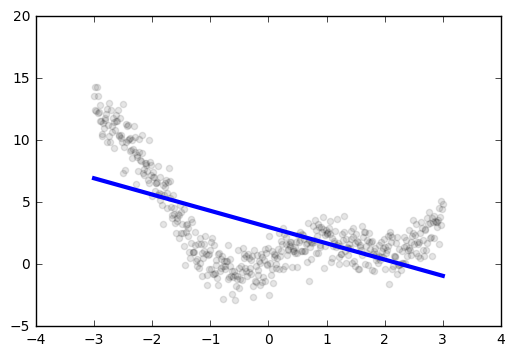

In [6]:
from sklearn import linear_model

N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig = .3 + -1*x + .9*x**2 + 2*np.sin(2*3.14*.3*x)
## Add white noise
y =  y_orig + np.random.randn(N)

regr = linear_model.LinearRegression()
regr.fit(x[np.newaxis].T, y[np.newaxis].T)
plt.scatter(x, y, color = 'black', alpha= .1)
plt.plot(x[np.newaxis].T, regr.predict(x[np.newaxis].T), color = 'blue', linewidth=3);

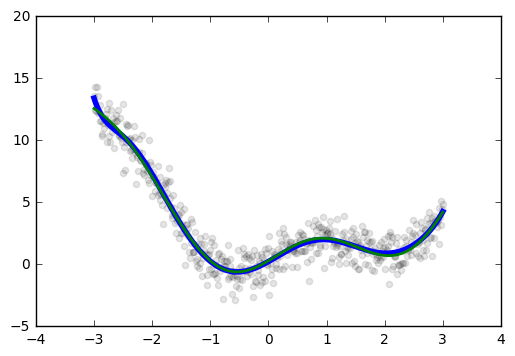

In [7]:
# build design matrix to append bias (1's)
X = np.hstack((x[np.newaxis].T, np.ones((N,1))))


M = 10 # number of hidden nodes
## setup random weights to project data
weights = 1./M*np.random.randn(M,2)


Z = np.tanh(np.dot(X,weights.T))


regr = linear_model.LinearRegression()
regr.fit(Z, y[np.newaxis].T)
plt.scatter(x, y, color = 'black', alpha= .1)
plt.plot(x[np.newaxis].T, regr.predict(Z), color = 'blue', linewidth=4)
plt.plot(x, y_orig, color = 'green', linewidth = 2);

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LinearRegression

import numpy as np

class SimpleMLP(BaseEstimator, ClassifierMixin):  
    """Simple MLP with fixed hidden layer weights; ie original perceptron/Adaline
    Algo description: https://github.com/myazdani/ML-examples/blob/master/ADALINE.ipynb
    The simple MLP uses the LinearRegression model from Scikit learn and takes the same params.
    
    Parameters
    ----------
    num_neurons: int
        Number of hidden neurons to use. Defaults to 1000.
    gain: floatM
        Variance of the initialization weight for the hidden layer weights. Defaults to 0.01
    np_random_seed: int
        Seed for numpy random generator used for 
        
    **kwargs:
        Additional arguments to send to LinearRegression model
        
        
    Attributes
    ----------
    reg_ : LinearRegression object
        The LineaRegression object used to fit
    
    weights_: array, shape (n_features, num_neurons)
        Weights that are initialized to inputs project to hidden layer
        
    Examples
    -------    
    X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
    Y = np.array([1, 1, 2, 2])
    reg = SimpleMLP(np_random_seed=111, alpha = .1)
    reg.fit(X,Y)
    print(reg.predict(X))    
    """    

    def __init__(self, num_neurons = 1000, gain=0.01, np_random_seed = None, **kwargs):

        self.num_neurons = int(num_neurons)
        self.gain = gain
        self.np_random_seed = np_random_seed
        self.reg_ = LinearRegression(**kwargs)

    def fit(self, X, y=None):
        # initialize weights
        np.random.seed(self.np_random_seed)
        self.weights_ = self.gain*np.random.randn(self.num_neurons,X.shape[1]).T
        # project
        Z = np.tanh(np.dot(X, self.weights_))
        # do actual "learning"
        self.reg_.fit(Z,y)
        
        return self


    def predict(self, X, y=None):
        Z = np.tanh(np.dot(X, self.weights_))
        return self.reg_.predict(Z)





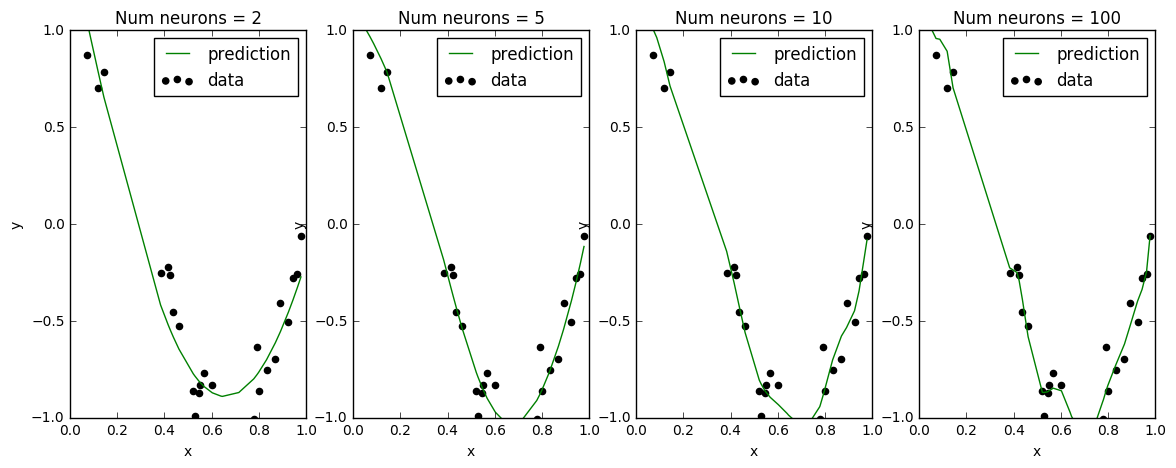

In [9]:
plt.figure(figsize=(14, 5))

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# #############################################################################
# Fit regression model
num_neurons = [2, 5, 10, 100]

for i, num_neuron in enumerate(num_neurons):
    dt = SimpleMLP(num_neurons=num_neuron, gain = 1)
    y_ = dt.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(depths), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X[:,np.newaxis], y_, c='g', label='prediction')
    plt.legend()
    plt.title("Num neurons = %i" % (num_neuron))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")

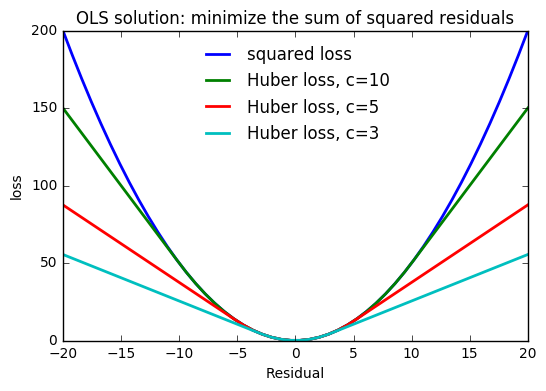

In [10]:
t = np.linspace(-20, 20)

def huber_loss(t, c=3):
    return ((abs(t) < c) * 0.5 * t ** 2
            + (abs(t) >= c) * -c * (0.5 * c - abs(t)))

plt.plot(t, 0.5 * t ** 2, label="squared loss", lw=2)
for c in (10, 5, 3):
    plt.plot(t, huber_loss(t, c), label="Huber loss, c={0}".format(c), lw=2)
plt.ylabel('loss')
plt.xlabel('Residual')
plt.title('OLS solution: minimize the sum of squared residuals');
plt.legend(loc='best', frameon=False);

# Logistic regression

- In regression the output $y \in \mathbb{R}$ is a continuous variable.


- In binary classification, the output $y \in \{0, 1\}$ is in a set of categories
  - positive vs. negative class
  - Detecting fraud, cancer, etc.
  
  
- It may be tempting to use the machinery of linear regression to fit a linear function between the input and output as we did for OLS or Ridge Regression:

$$ y = w_{0} + \sum_{i=1}^{n}w_{i}x_{i}$$

- The output of linear function is a continuous variable in $\mathbb{R}$. For solving classification problems we need to decide how we are going to translate this continuous output into a discrete decision

- In logistic regression, this is done via the *sigmoid* or *logistic* function. This function for $z \in \mathbb{R}$ is defined as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

- So to have solve classification problems, we set $z = w_{0} + \sum_{i=1}^{n}w_{i}x_{i}$

- The origin of the sigmoid comes from modeling the log-odds of a binary event

$$\text{log}\big(\frac{p}{1-p}\big) =   w_{0} + \sum_{i=1}^{n}w_{i}x_{i}$$

- Typically $p$ is the probability of the positive class
  - Probability email is spam, transaction is fraud, tumor is cancerous

- Solving for $p$ yields the logistic function  

- Similar to linear regression, we will write this more compactly as:

$$ p = \sigma(w^{T}x)$$ 



# Softmax classifier: going beyond binary classification

- If we have more than 2 classes, we can use a a one-against-all or one-versus-all strategy. This works for any binary classifier:
    - Train a logistic regression for each class (positive class vs the rest)
    - If you have $K$ classes, this will result in $K$ models
    - During inference, compute the probabilities from all $K$ logistic regression models and select class with highest score (probability)
    
    
    
- Multiple classes can be modeled as a multinomial (as opposed to a binomial). The softmax classifier works to simultaneously model the multinomial

$$P(y = j) = \frac{e^{w_{j}^{T}x}}{\sum_{k=0}^{K-1}e^{w_{k}^{T}x}}$$

- For $x \in \mathbb{R}^{n}$, $w_j \in \mathbb{R}^n$, $y \in \{0, 2, \ldots, K-1\}$ where y is an element of one of $K$ classes

- For the case of binary classification, $y \in \{0, 1\}$ and we have

$$ P(y = 1) = \frac{e^{w_{1}^{T}x}}{e^{w_{0}^{T}x} + e^{w_{1}^{T}x}}$$

- One way of thinking about the the softmax classifier is having a separate set of weights $w_j$ for each class $j \in \{0, 1, \ldots, K-1\}$. 


- So the softmax classifier is trying to learn a separate logistic regression classifier for each class $j$ by learning a set of parameters $w_j$ specific for each class.



- Note that we can just re-express this the same as a single logistic regression by defining $w \triangleq w_1 - w_0$

$$ P(y = 1) = \frac{1}{1 + e^{-w^{T}x}}$$


- To simplify notation, we will write a softmax classifier for $j = 0, 1, \ldots, K-1$ classes as 

$$ y = \underset{j}{\text{argmax }}\sigma(w_j^{T}x)$$


<img src="./imgs/lecture-4/multinomial-ovr.png" height="800" width="1000">

# Cross entropy loss

- We learn a softmax classifier by minimizing the cross entropy loss:


$$ L\big(f_{w}(x_{i}), y_{i}\big) = -\sum_{j=0}^{K-1}I(y_i = j)\text{ log}\bigg(\frac{e^{w_{j}^{T}x}}{\sum_{k=1}^{K}e^{w_{k}^{T}x}}\bigg) $$ 

- where

$$I(y_i = j) = \left\{\begin{matrix}
1 & \text{if } y_i = j\\ 
0 & \text{otherwise}
\end{matrix}\right.$$




- For $x_i \in \mathbb{R}^{n}$, $y \in \mathbb{R}^{m}$and $w \in \mathbb{R}^{p}$


- As before, we can add additional regularization terms when we minimize the risk

$$L_{\theta}\big(f_{w}(x_{i}), y_{i}\big) = L\big(f_{w}(x_{i}), y_{i}\big) + E_{\theta}(w)$$

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} &\sum_{i=1}^{N} L_{\theta}\big(f_{w}(x_{i}), y_{i}\big)
\end{aligned}$$ 


- As before, a popular choice for $E_{\theta}(w)$ is the $l_2$ norm of the weights 

# Template Matching and Support Vector Machines


- You might ask, "the softmax classifier gives me a probability which is sort of like a soft decision. While that's useful, I just want to make a 'hard' decision. What if we just took the sign of a linear classifier?"

$$ f(x, W, b) = Wx + b$$

- where $x \in \mathbb{R}^{n}$, $W \in \mathbb{R}^{K\times n}$, and $b \in \mathbb{R}^{n}$

- As before, to make the notation more compact we will write this as

$$ f(x, W) = Wx $$

- Each row of $W$ corresponds to the one of the $K$ classes. Writing this another way, we have:

$$ f(x, W) = \begin{bmatrix}
w_{0}^{T}\\ 
\vdots\\ 
w_{K-1}^{T}
\end{bmatrix} x$$

- Recall that the inner product is a measure of similarity between two vectors. $w_{j}^{T}x$ is a measure of how much does the input $x$ match/align with the weights $w_j$. We can think of each row $w_{j}$ of $W$ as a set of templates for the different $K$ classes


- Thus, $w_{j}^{T}x$ is a score of how much does $x$ align with the template $w_{j}$ corresponding to class $j \in \{0, 1, \ldots, K-1\}$
    - A large positive $w_{j}^{T}x$ indicates a strong score associated with class $j$
    
    
- To make inference, we find the template (row) that has the largest score:

$$ y = \underset{j}{\text{argmax }}w_j^{T}x $$ 

- Compare this against the softmax classifier:

$$ y = \underset{j}{\text{argmax }}\sigma(w_j^{T}x)$$

- While they may look similar, they are slightly different. The difference is especially most pronounced when we consider the loss functions used. For the softmax classifier, we used the cross entropy loss since it derived naturally from measuring the KL-divergence between the target class and the output of the softmax function. 


- The loss function used for the linear template matching algorithm we are looking at here is the hinge-loss


- In the case of *binary* classification where (so we only have one template) $y \in \{-1, 1\}$ , the hinge loss is expressed as:

$$ L\big(f_{w}(x_{i}), y_{i}\big) = \text{max}(0, 1 - y_i f_w(x_i)) + E_{\theta}(w) $$ 

- where $f_{w}(x) = w^{T}x$ (with our compact notation of include the bias terms) and $y \in \{-1, 1\}$. We can again write this as:

$$ L\big(f_{w}(x_{i}), y_{i}\big) = \text{max}(0, 1 - y_i w^{T}x_i)) + E_{\theta}(w)$$ 

- What this loss is trying to express is we want to find a template $w$ that gives a strong score that is at least somee margin away. For the general multi-class case we can write:

$$ L\big(f_{w}(x_{i}), y_{i}\big) = \sum_{k \neq y_i}\text{max}(0, 1 + w_{k}^{T}x_i - w_{y_{i}}^{T}x_i) + E_{\theta}(w)$$ 

- where $w_{y_{i}}$ denotes the template corresponding to the class $y_{i} \in \{0, 1, \ldots, K-1\}$



- Such classifiers that use a linear function and this loss function are referred to as support vector machines

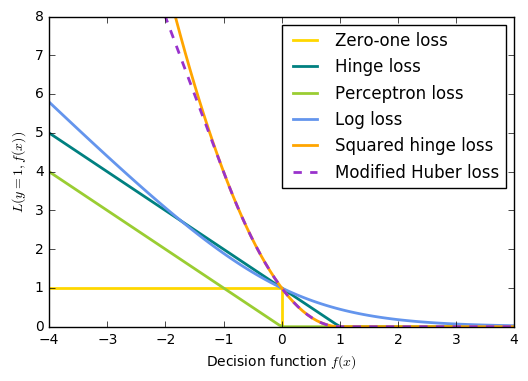

In [11]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2


plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$");

# Support Vector Machines

- Some people make distinction between "hard" margin SVM and "soft" margin
    - "hard" margin is only relevant if the classes are linearly separable; almost never used in practice 
    - Increasing the slope of the hinge loss gives intuition as to what hard margin solutions look like
    
    
- The "dual" formulation of the loss function can lead to using the kernel trick. This allows us to use potentially very high dimensional feature projections    

# Dealing with high dimensional feature space: the kernel trick

- It turns out many algorithms have a particular structure that allows us to take advantage of the "kernel trick"



- Algorithms that make inference by using *inner products* of the features allow for the use of the kernel trick. For example, any algorithm that depends on computations involving the following can benefit from the kernel trick:

$$ x_{i}^{T}x_{j}$$

- which in projected feature space can be expressed as $\phi(x_{i})^{T}\phi(x_{j})$. Note that if $\phi(\cdot)$ projects to a high dimensional vector space, the transformation and storage can be very expensive
    - $x \in \mathbb{R}^{d}$ and $\phi(x) \in \mathbb{R}^{D}$ with $D \gg d$ $\rightarrow$ $O(D^{2})$ computations for computing the inner product $\phi(x_{i})^{T}\phi(x_{j})$
    
    
    
- In reality we only care about the value of the inner product of $\phi(x_{i})^{T}\phi(x_{j})$. 



- Therefore, we do not need to explicitly compute $\phi(x)$. We just need the value of $\phi(x_{i})^{T}\phi(x_{j})$


- The kernel trick uses a *positive definite kernel* that is a symmetric function that maps inputs to the reals $K: X \times X \rightarrow \mathbb{R}$ and the function $K$ satisfies the positive definite property:

$$\sum_{i= 1}^{n}\sum_{j = 1}^{n} c_{i}c_{j}K(x_{i}, x_{j}) \ge 0$$


- The positive definite condition must hold true for any $n \in \mathbb{N}, x_i \in X, c_i \in \mathbb{R}$
    - Note that we have so far only consider data that is $x \in \mathbb{R}^{n}$
    - But a kernel function relaxes this to allow $x$ to an element of any nonempty set.
    
    
- In short, the kernel trick is allowing us to use any symmetric positive definite function $K(x_{i}, x_{j})$ to bypass computing $\phi(x_{i})^{T}\phi(x_{j})$   


- So any algorithm that uses the inner-products or dot-products of $\phi(x_{i})^{T}\phi(x_{j})$ can use the kernel trick

# Popular kernels

- Polynomial kernel with degree $d$:
    - $d, \gamma, c$ are hyperparameters that you select through gridsearch 

$$k(x,y) = \big(\gamma x^{T}y + c\big)^{d}$$


- Sigmoid kernel
    - $\gamma, c$ are hyperparameters 

$$k(x,y) = \text{tanh}\big(\gamma x^{T}y + c\big)$$

- Radial Basis Function kernel:
    - $\gamma$ is a hyperparameter

$$k(x,y) = \text{exp}\big(-\gamma||\phi(x_i) - \phi(x_j)||_{2}^{2}\big)$$


- Lots more! As usual, the choice of kernel depends on the problem domain but for most data mining applications these are used

# 1-nearest neighbor examples using Kernels

- Recall that in 1-nearest neighbor, we seek to find the point $x_j$ that is closest to the query point $x_i$

$$||\phi(x_i) - \phi(x_j)||_{2}^{2}$$


- To use the kernel trick (so that we avoid computing $\phi(x)$ directly, we can rewrite this as:

$$\big(\phi(x_i) - \phi(x_j)\big)^{T}\big(\phi(x_i) - \phi(x_j)\big)$$


- which we can then rewrite as:
$$\phi(x_i)^{T}\phi(x_i) - 2\phi(x_j)^{T}\phi(x_i) + \phi(x_j)^{T}\phi(x_j)$$


- since this is now in inner product form, we can rewrite 1-nearest neighbors using kernels

$$K(x_{i}, x_{i}) - 2K(x_{i}, x_{j}) + K(x_{j}, x_{j})$$



# Ridge regression kernelized 

- Recall that in ridge regression, for $w, x_i \in \mathbb{R}^{d}, y_i \in \mathbb{R}$ the regularized solution for linear regression $y_i = x_{i}^{T}w$ is the following:

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} & \Bigg\{\sum_{i=1}^{N}(y_i - x_i^{T}w)^2 + \theta \sum_{j}^{d}w_{j}^{2}\Bigg\}
\end{aligned}$$ 

- Or expressed more compactly as 

$$w^{*} = \begin{aligned}
\underset{w}{\text{argmin}} & \Big\{(y - Xw)^T(y - Xw) + \theta w^{T}w\Big\}
\end{aligned}$$ 


-  where we have stacked all the outputs and inputs as:

$$y  = \begin{bmatrix} y_1\\ \vdots \\y_N\end{bmatrix}\in \mathbb{R}^{N} \qquad X  = \begin{bmatrix} x_{1}^{T}\\ \vdots \\x_{N}^{T}\end{bmatrix}\in \mathbb{R}^{N \times d}$$

- The ridge regression solution is:

$$ w = \big(X^{T}X + \theta I\big)^{-1}X^{T}y = \Big(\sum_{i=1}^{N}x_{i}x_{i}^{T} + \theta I\Big)^{-1}X^{T}y $$

- where $I \in \mathbb{R}^{d\times d}$ is the identity matrix. Note that the inverse always exists for $\theta > 0$



- How do we kernelize this? We must express the solution in inner product form. For this, we can use one of the many matrix inversion lemmas:

$$ w = X^{T}\big(XX^{T}+\theta I\big)^{-1}y$$ 

- Exept for the pesky leading $X^{T}$, the solution for $w$ is almost in dot product for and we can use the kernel trick. We re-write the solution for $w$ as:

$$ w = X^{T}\textbf{$\alpha$} = \sum_{i=1}^{N}\alpha_{i}x_{i}$$ 

- where $\textbf{$\alpha$} \triangleq \Big(\textbf{K}+\theta I\Big)^{-1}y$, and $\textbf{K} \in \mathbb{R}^{N\times N}$ is the Gram matrix for the kernel $k(\cdot, \cdot)$:

$$\textbf{K} \triangleq \begin{bmatrix} k(x_{1}, x_{1}) & k(x_{1}, x_{2}) & \ldots & k(x_{1}, x_{N}) \\
k(x_{2}, x_{1}) & k(x_{2}, x_{2}) & \ldots & k(x_{2}, x_{N}) \\
\vdots & \vdots & \ddots & \vdots \\
k(x_{N}, x_{1}) & k(x_{N}, x_{2}) & \ldots & k(x_{N}, x_{N})\end{bmatrix}$$

- Having expressed $w$ in terms of the Gram matrix then during testing we when we want to find the solution to a new input $x$ we compute the following:

$$ y = x^{T}w = w^{T}x = \sum_{i=1}^{N}\alpha_{i}x_{i}^{T}x$$

- We notice that the last term is in inner product form and can therefore again use the kernel trick with kernel function $k(\cdot, \cdot)$:


$$ y = x^{T}w = w^{T}x = \sum_{i=1}^{N}\alpha_{i}k(x_{i}, x)$$

In [12]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 2, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

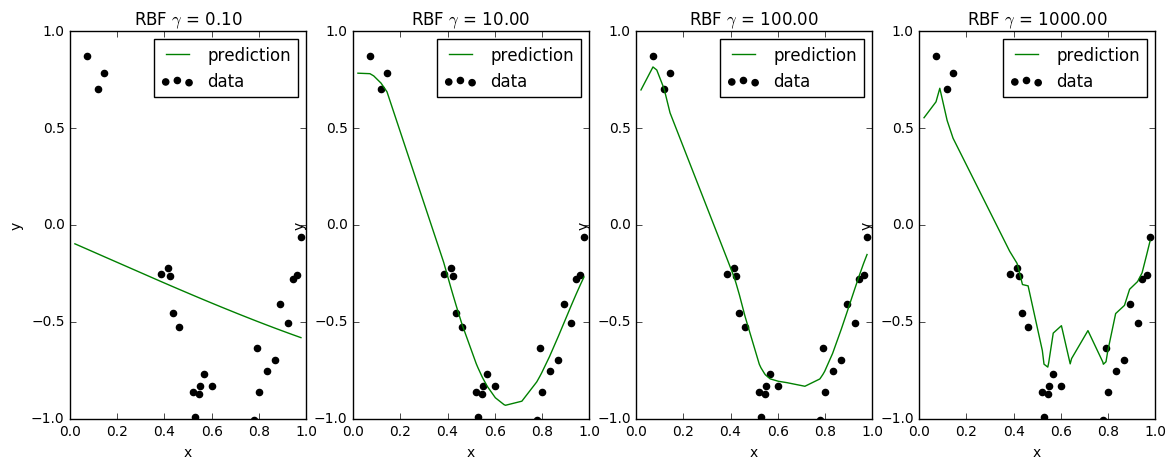

In [13]:
plt.figure(figsize=(14, 5))

from sklearn.kernel_ridge import KernelRidge
# #############################################################################
# Fit regression model
gammas = [1e-1, 1e1, 1e2, 1e3]

for i, gamma in enumerate(gammas):
    dt = KernelRidge(kernel = "rbf", gamma = gamma)
    y_ = dt.fit(X[:,np.newaxis], y).predict(X[:,np.newaxis])

    plt.subplot(1, len(depths), i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X[:,np.newaxis], y_, c='g', label='prediction')
    plt.legend()
    plt.title("RBF $\gamma$ = %.2f" % (gamma))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1, 1))
    plt.legend(loc="best")

# Kernels everywhere

- Any algorithm that can be expressed in inner product form can use the kernel trick
    - PCA, regression, SVMs, ICA, matched filters
    
    
- If you see an inner product, kernelize!

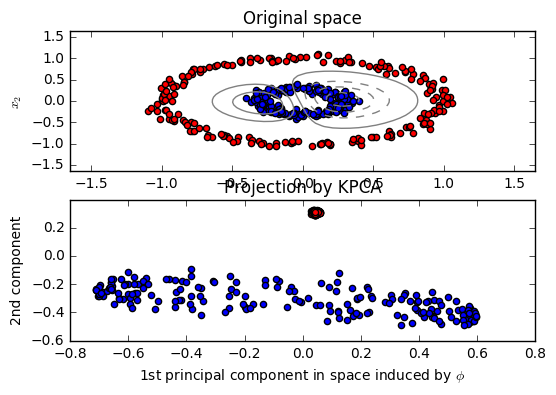

In [14]:
plt.figure(figsize=(4, 15))

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 1, 1)
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$");

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')



plt.subplot(2, 1, 2)
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component");



#plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35);

# The problem with kernels

- Computing the Gram/kernel matrix for large datasets can be expensive 
    - Approximation methods can help



- In general, it is *not* clear what kernel to pick or design:
    - RBF, polynomial, sigmoid and combinations are popular but are they the best?
    - Designing a kernel can be heavily domain dependent 


- Artificial Neural Networks with a single hidden layer try to *learn* the feature mapping from the data itself


$$\textbf{z} = \phi(x) = \tanh(\textbf{W}_{0}x)$$

$$y = \textbf{W}_{1}\textbf{z}$$
$$y = \textbf{W}_{1}\phi(x)$$


- Don't just learn $\textbf{W}_{1}$, but also learn $\textbf{W}_{0}$!

# Neural Networks

- A neural network with 1 hidden layer:

$$\textbf{z} = \phi_{W_0}(x) = \tanh(\textbf{W}_{0}x)$$

$$y = \textbf{W}_{1}\textbf{z}$$
$$y = \textbf{W}_{1}\phi_{W_0}(x)$$

- Learn $W_{1}$ *and* $W_{0}$ to minimize the emprical risk:
$$w^{*} = \begin{aligned}
\underset{W_1, W_0}{\text{argmin}} & \Bigg\{\sum_{i=1}^{N}\big(y_i - \textbf{W}_{1}\tanh(\textbf{W}_{0}x)\big)^2 + \theta_1 ||\textbf{W}_{1}|| + \theta_0||\textbf{W}_{0}||\Bigg\}
\end{aligned}$$ 



- Theory shows that for "wide" enough $W_0$, such functions can be approximate "any function" 
    - As we know from the kernel trick, you can make $W_0$ infinitely wide and approximate any function
    - Finding the right function and not overfitting is a different matter!


- Unfortunately this is a very difficult optimization problem 


- Many tricks have been used over the years to solve such problems
    - Very active area of research and development!